In [44]:
# Import Libraries
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns

In [45]:
# Load your dataset
df = pd.read_csv('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Anonymized\\aug_train_anonymized.csv')
df.head()

,id,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Age_Group,Annual_Premium_Treated
0,ca21a51d-28e2-47bd-8dae-6e249b5d458d,Male,1,7.0,1,< 1 Year,No,152.0,16,0,YoungAge,2630.0
1,327b5be5-8ff2-4f50-98d5-91b1817cf447,Male,1,28.0,0,1-2 Year,Yes,26.0,135,0,MiddleAge,43327.0
2,5a43fb76-7db1-435a-8954-754cc9da0fb2,Female,1,33.0,0,1-2 Year,Yes,124.0,253,0,OldAge,35841.0
3,c5aa742b-9b6b-495a-9dcb-1a41b85f8812,Female,1,33.0,0,< 1 Year,No,152.0,69,0,YoungAge,27645.0
4,61e8d449-5da0-4f6e-bba1-77bf812e9bf7,Male,1,46.0,1,< 1 Year,No,152.0,211,0,YoungAge,29023.0


In [46]:
#This code will create a new column in the DataFrame called Region_Category,
#which categorizes each Region_Code as 'High', 'Medium', or 'Low' based on how frequently each code appears relative to others.

def categorize_region(df):
    # Get the counts of each unique value in 'Region_Code'
    region_counts = df['Region_Code'].value_counts()
    
    # Define thresholds for high, medium, and low frequency
    high_threshold = region_counts.quantile(0.75)  # Top 25% of regions by frequency
    medium_threshold = region_counts.quantile(0.25)  # Bottom 25% of regions by frequency
    
    # Function to apply to each region to determine its category
    def get_region_category(region):
        if region_counts[region] > high_threshold:
            return 'High'
        elif region_counts[region] < medium_threshold:
            return 'Low'
        else:
            return 'Medium'
    
    # Apply the function to 'Region_Code' to create a new 'Region_Category' column
    df['Region_Category'] = df['Region_Code'].apply(get_region_category)
    
    return df

# Assuming 'df' is your DataFrame
df = categorize_region(df)

# Now, if you want to see the first few rows to check the new category
print(df.head())

                                     id  Gender  Driving_License  Region_Code  \
0  ca21a51d-28e2-47bd-8dae-6e249b5d458d    Male                1          7.0   
1  327b5be5-8ff2-4f50-98d5-91b1817cf447    Male                1         28.0   
2  5a43fb76-7db1-435a-8954-754cc9da0fb2  Female                1         33.0   
3  c5aa742b-9b6b-495a-9dcb-1a41b85f8812  Female                1         33.0   
4  61e8d449-5da0-4f6e-bba1-77bf812e9bf7    Male                1         46.0   

   Previously_Insured Vehicle_Age Vehicle_Damage  Policy_Sales_Channel  \
0                   1    < 1 Year             No                 152.0   
1                   0    1-2 Year            Yes                  26.0   
2                   0    1-2 Year            Yes                 124.0   
3                   0    < 1 Year             No                 152.0   
4                   1    < 1 Year             No                 152.0   

   Vintage  Response  Age_Group  Annual_Premium_Treated Region_Categ

In [47]:
import pandas as pd
import numpy as np

def categorize_region(df):
    if 'Region_Code' not in df.columns:
        raise ValueError("DataFrame must include a 'Region_Code' column")
    
    # Get the counts of each unique value in 'Region_Code'
    region_counts = df['Region_Code'].value_counts()
    
    # Convert region_counts to a dictionary for faster access
    region_counts_dict = region_counts.to_dict()
    
    # Define thresholds for high, medium, and low frequency dynamically
    high_threshold = np.percentile(list(region_counts), 66)  # Top third of regions by frequency
    medium_threshold = np.percentile(list(region_counts), 33)  # Bottom third of regions by frequency
    
    # Function to apply to each region to determine its category
    def get_region_category(region):
        region_freq = region_counts_dict.get(region, 0)
        if region_freq > high_threshold:
            return 'High'
        elif region_freq < medium_threshold:
            return 'Low'
        else:
            return 'Medium'
    
    # Apply the function to 'Region_Code' to create a new 'Region_Category' column
    df['Region_Category'] = df['Region_Code'].apply(get_region_category)
    
    return df

# Example usage
# df is your DataFrame
df = categorize_region(df)
print(df[['Region_Code', 'Region_Category']].head())


   Region_Code Region_Category
0          7.0          Medium
1         28.0            High
2         33.0            High
3         33.0            High
4         46.0            High


In [48]:
print(df.columns)


Index(['id', 'Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vintage',
       'Response', 'Age_Group', 'Annual_Premium_Treated', 'Region_Category'],
      dtype='object')


In [49]:
df = df.drop(['Driving_License','Region_Code'], axis=1)
x = df.drop(['id'], axis=1)

# **Feature Selection**
---

## **Categorical Feature Selection**

In [50]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for the new dataset
le_vehicle_age_new = LabelEncoder()
le_vehicle_damage_new = LabelEncoder()
le_age_new = LabelEncoder()
le_gender_new = LabelEncoder()
le_region_new = LabelEncoder()
#le_vintage_new = LabelEncoder()
#le_region_frequency= LabelEncoder()

# Encode categorical columns in the new dataset
df['Vehicle_Age'] = le_vehicle_age_new.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = le_vehicle_damage_new.fit_transform(df['Vehicle_Damage'])
df['Age_Group'] = le_age_new.fit_transform(df['Age_Group'])
df['Gender'] = le_age_new.fit_transform(df['Gender'])
df['Region_Category'] = le_region_new.fit_transform(df['Region_Category'])

df.head()

,id,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Age_Group,Annual_Premium_Treated,Region_Category
0,ca21a51d-28e2-47bd-8dae-6e249b5d458d,1,1,1,0,152.0,16,0,2,2630.0,2
1,327b5be5-8ff2-4f50-98d5-91b1817cf447,1,0,0,1,26.0,135,0,0,43327.0,0
2,5a43fb76-7db1-435a-8954-754cc9da0fb2,0,0,0,1,124.0,253,0,1,35841.0,0
3,c5aa742b-9b6b-495a-9dcb-1a41b85f8812,0,0,1,0,152.0,69,0,2,27645.0,0
4,61e8d449-5da0-4f6e-bba1-77bf812e9bf7,1,1,1,0,152.0,211,0,2,29023.0,0


In [51]:
df.head()

,id,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Age_Group,Annual_Premium_Treated,Region_Category
0,ca21a51d-28e2-47bd-8dae-6e249b5d458d,1,1,1,0,152.0,16,0,2,2630.0,2
1,327b5be5-8ff2-4f50-98d5-91b1817cf447,1,0,0,1,26.0,135,0,0,43327.0,0
2,5a43fb76-7db1-435a-8954-754cc9da0fb2,0,0,0,1,124.0,253,0,1,35841.0,0
3,c5aa742b-9b6b-495a-9dcb-1a41b85f8812,0,0,1,0,152.0,69,0,2,27645.0,0
4,61e8d449-5da0-4f6e-bba1-77bf812e9bf7,1,1,1,0,152.0,211,0,2,29023.0,0


## **Numeric Feature Selection**

Let's see the Pearson's correlation between numerical features.

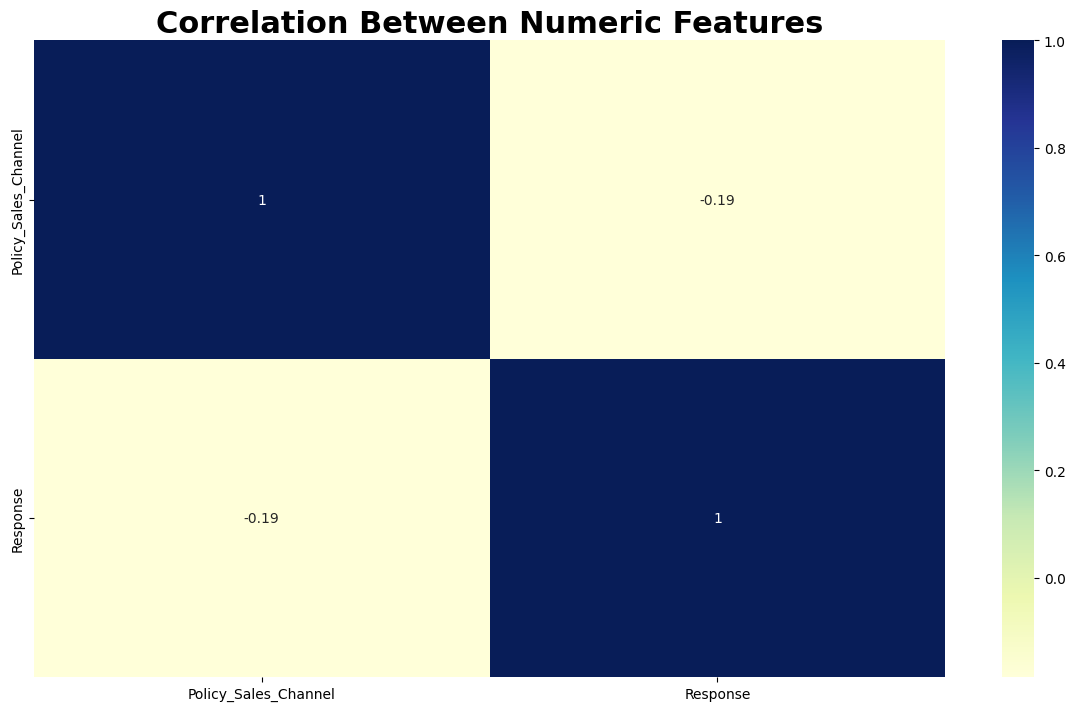

In [52]:
def numeric_feature_selection(df):
    plt.rcParams['figure.figsize'] = (14.7, 8.27)
    numeric_features = ['Policy_Sales_Channel', 'Response']
    
    # Using Pearson's correlation
    sns.heatmap(df[numeric_features].corr(), cmap="YlGnBu", annot=True)
    plt.title('Correlation Between Numeric Features', fontdict={'fontsize': 22, 'fontweight': 'bold'})
    plt.show()

# Assuming 'df' is your DataFrame containing the 'Annual_Premium_Treated' and 'Vintage' columns
numeric_feature_selection(df)

In [53]:
#from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
#scaler = MinMaxScaler()

# Select the numerical features for scaling
#numerical_features = ['Policy_Sales_Channel', 'Vintage', 'Annual_Premium_Treated']

# Scaling the selected features
#df[numerical_features] = scaler.fit_transform(df[numerical_features])



*   There is no correlation between these two features, as a result we are going to move forward with both of them.

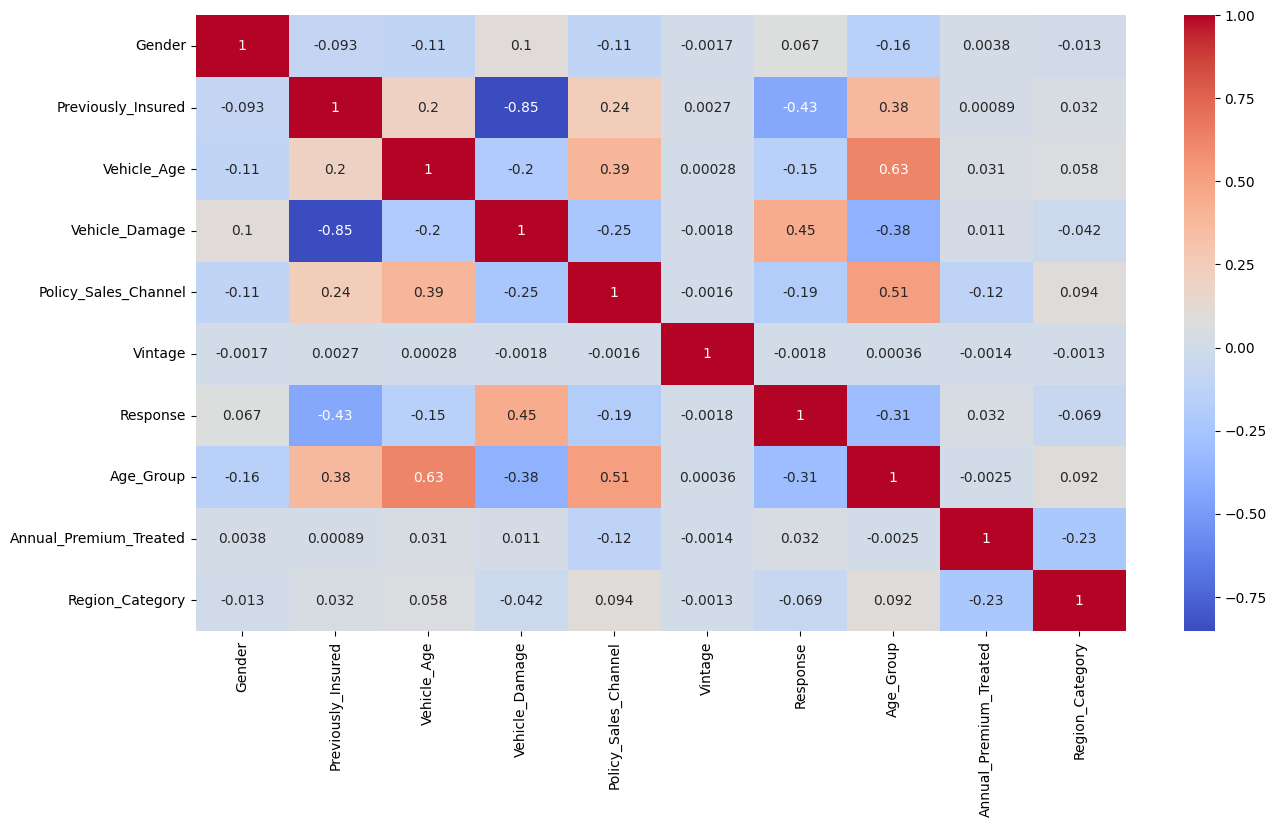

In [54]:
# Correlation Heatmap visualization code
x = df.drop(['id'], axis=1)
corr_df = x.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_df,cmap='coolwarm',annot=True)
plt.show()

The heatmap showcases the Pearson correlation coefficients between different features. Notable correlations include a strong negative relationship between `Previously_Insured` and `Vehicle_Damage` (-0.85), indicating that individuals who were previously insured are less likely to have vehicle damage. `Vehicle_Age` and `Age_Group` show a strong positive correlation (0.63), suggesting that older vehicles are more commonly owned by individuals in higher age groups. The correlation between `Annual_Premium_Treated` and the `Response` is weak (0.032), implying little linear relationship between the premium amount and the likelihood of a customer opting for insurance. There's also a moderate positive correlation between `Vehicle_Damage` and `Response` (0.45), which might indicate that customers with vehicle damage are more inclined to respond positively to insurance offers. The other variables show low to negligible correlations, indicating no strong linear relationships with one another.

### **Mutual Information**
Mutual information is one of many quantities that measures how much one random variables tells us about another.

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_2416\1482063175.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_df, x='Feature', y='Score', palette=colors)


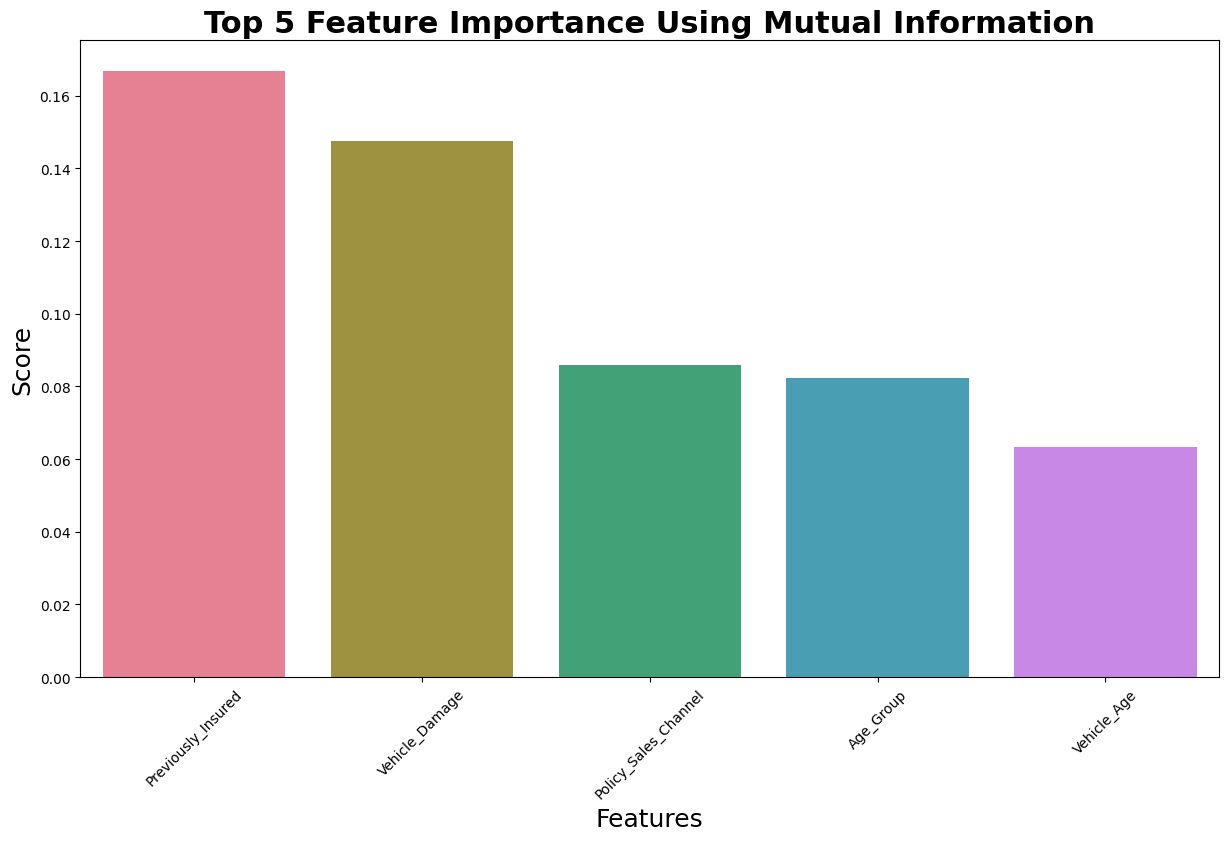

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

def mutual_info(df):
    X = df.copy()
    X = X.drop(['id'], axis=1)
    y = X.pop("Response")
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    feature_scores = mutual_info_classif(x_train, y_train, random_state=0)

    column_score = {'Feature': [], 'Score': []}
    for score, f_name in sorted(zip(feature_scores, x_train.columns), reverse=True):
        column_score['Feature'].append(f_name)
        column_score['Score'].append(score)

    return pd.DataFrame(data=column_score)

def show_feature_importance_through_mi(df):
    mi_df = mutual_info(df).head(5)  # Select top 5 features
    colors = sns.color_palette("husl", len(mi_df))  # Different colors for the bars
    
    sns.barplot(data=mi_df, x='Feature', y='Score', palette=colors)
    plt.title('Top 5 Feature Importance Using Mutual Information', fontdict={'fontsize':22, 'fontweight':'bold'})
    plt.xlabel('Features', fontdict={'fontsize':18})
    plt.ylabel('Score', fontdict={'fontsize':18})
    plt.xticks(rotation=45)
    plt.show()

# Assuming 'df' is your DataFrame
show_feature_importance_through_mi(df)


In this chart, Previously_Insured and Vehicle_Damage have the highest mutual information scores, suggesting they are important features in predicting the target variable. Policy_Sales_Channel and Age_Group also provide significant information but to a lesser extent. Conversely, Vintage has the lowest score, indicating it has the least amount of shared information with the target variable and may not be as useful for prediction in the context of the other features.

In [ ]:
# Load the anonymized dataset and see the first rows
anonymized_file_path = 'C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Preprocessed\\aug_train_processed.csv'
df.to_csv(anonymized_file_path, index=False)
df.head()

,id,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Age_Group,Annual_Premium_Treated,Region_Category
0,256cff20-2933-412b-8fd1-d93b113ff9f3,1,1,1,0,152.0,16,0,2,2630.0,2
1,9bbdd5ef-c87b-4622-bd18-21a28d1baba6,1,0,0,1,26.0,135,0,0,43327.0,0
2,3a1faee0-10e4-4e5a-b1c1-3a572aac63b1,0,0,0,1,124.0,253,0,1,35841.0,0
3,c05d8176-7d51-4857-a514-a0841b2c4217,0,0,1,0,152.0,69,0,2,27645.0,0
4,dbc03b1c-e704-4752-a9ed-61b5d8267150,1,1,1,0,152.0,211,0,2,29023.0,0


In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0